# <center>支持向量机</center>

支持向量机通过寻找一个能最大化训练集数据中分类间距的**超平面**来给数据进行分类。
- SVM=Support Vector Machine 支持向量机
- SVC=Support Vector Classification 支持向量机用于分类，
- SVR=Support Vector Regression 支持向量机用于回归分析。

### 17.1 训练一个线性分类器
#### 问题描述
训练一个模型对观察值分类。
#### 解决方案
用支持向量分类器(Support Vector Classifier, SVC)来寻找最大化分类之间间距的超平面。

In [1]:
# 加载库
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# 加载数据，数据中只有两种分类和两个特征
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

In [3]:
# 标准化特征
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [4]:
# 创建支持向量机分类器
svc = LinearSVC(C=1.0)

# 训练模型
model = svc.fit(features_standardized, target)

In [5]:
from matplotlib import pyplot as plt

# 画出样本点，并且根据其分类上色
color = ['blue' if c==0 else 'red' for c in target]
# 样本中，分类0为蓝色；分类1为红色；
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

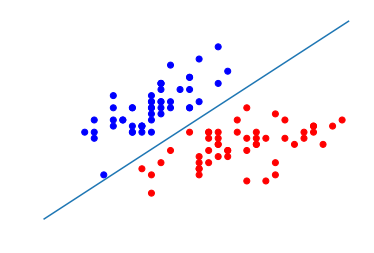

In [6]:
# 创建超平面
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a*xx - (svc.intercept_[0])/w[1]

# 画出超平面
plt.plot(xx, yy)
plt.axis('off')
plt.show()

### 17.2 使用核函数处理线性不可分的数据
#### 问题描述
训练一个SVC，但是数据是线性不可分的。
#### 解决方案
对于线性不可分的数据集，需要使用核函数训练支持向量机的一个高维映射，以创建非线性的决策边界。

In [7]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [8]:
# 设置随机种子
np.random.seed(0)
# 生成两个特征
features = np.random.randn(200, 2)

# 因为异或问题时线性不可分的
# 使用异或门创建数据
target_xor = np.logical_xor(features[:, 0]>0, features[:,1]>0)
target = np.where(target_xor, 0, 1)

# 创建一个有径向基核的支持向量机
svc = SVC(kernel='rbf', random_state=0, gamma=1, C=1)

# 训练分类器
model = svc.fit(features, target)

In [9]:
# 画出观察值和超平面决策边界
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(('red', 'blue'))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker='+', label=cl)

In [10]:
# 创建一个使用线性核函数的SVC
svc_linear = SVC(kernel='linear', random_state=0, C=1)

# 训练模型
svc_linear.fit(features, target)

# 采用线性核函数
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
   kernel='linear', max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

数据集中只有两个特征，所以可以在二维空间内画出其观察值、分类和模型的线性超平面。

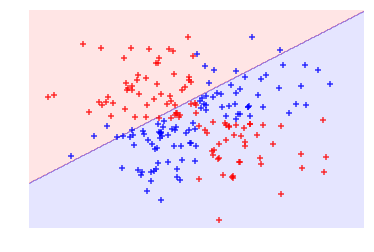

In [11]:
# 画出观察值和超平面
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis('off')
plt.show()

如上图所示，这个**线性超平面**的分类效果很差！

由图像可知，不存在一个线性超平面将样本数据进行有效的分类。

所以采用一个径向基核函数来替换线性核函数，然后用它来训练一个新模型。

**注：**高斯核函数，也称为 RBF 核（Radial Basis Function Kernel），也称为径向基函数

In [12]:
# 创建一个使用径向基核函数的SVC
# rbf 高斯核函数
svc = SVC(kernel='rbf', random_state=0, gamma=1, C=1)

# 训练当前分类器
model = svc.fit(features, target)

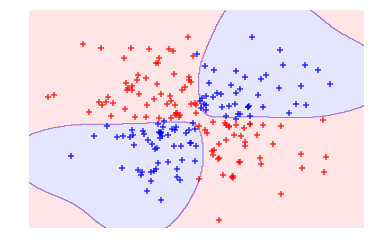

In [13]:
# 画出观察值和超平面
plot_decision_regions(features, target, classifier=svc)
plt.axis('off')
plt.show()

核函数中，多项式核函数中的d（通过degree参数来设置）和径向核函数中的y（通过gamma参数来设置）。C为惩罚参数

### 17.3 计算预测分类的概率
#### 问题描述
计算出观察值被预测为某一个分类的概率。
#### 解决方案
如果使用 scikit-learn的SVC，可以设置 probability=True，然后训练模型，接着可以使用 predict_proba() 方法来查看校准后的概率。

In [14]:
# 加载库
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [15]:
# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 标准化特征
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建SVC对象，设置预测
svc = SVC(kernel='linear', probability=True, random_state=0)

# 训练分类器
model = svc.fit(features_standardized, target)

# 创建一个新的观察值
new_observation = [[0.4, 0.4, 0.4, 0.4]]

# 查看观察值被预测为不同分类的概率
model.predict_proba(new_observation)

array([[0.00579881, 0.96697354, 0.02722765]])

### 17.4 识别支持向量
#### 问题描述
找出哪些观察值是决策超平面的支持向量。
#### 解决方案
训练模型，然后使用 support\_vectors_() 方法。

In [16]:
# 加载库
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [17]:
# 加载只有两个分类的数据
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# 标准化特征
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建SVC对象，设置预测
svc = SVC(kernel='linear', random_state=0)

# 训练分类器
model = svc.fit(features_standardized, target)

# 查看支持向量
model.support_vectors_

array([[-0.5810659 ,  0.43490123, -0.80621461, -0.50581312],
       [-1.52079513, -1.67626978, -1.08374115, -0.8607697 ],
       [-0.89430898, -1.46515268,  0.30389157,  0.38157832],
       [-0.5810659 , -1.25403558,  0.09574666,  0.55905661]])

训练完SVC之后，scikit-learn提供了很多识别支持向量的选项。

In [18]:
# 输出模型中观察值特征的4个支持向量
model.support_

array([23, 41, 57, 98])

In [19]:
# 查看每个分类有几个支持向量
model.n_support_

array([2, 2])

### 17.5 处理不均衡的分类
#### 问题描述
用不均衡的分类数据训练一个SVC。
#### 解决方案
当对数据量少的类别分类错误之后，使用 class_weight() 方法来增加惩罚。

In [20]:
# 加载库
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [21]:
# 加载只有两个分类的数据
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# 删除前40个观察值，让每个类别的数据分别不均衡
features = features[40:,:]
target = target[40:]

# 创建目标向量，数值0代表分类0，其他分类用数值1表示。
target = np.where((target==0), 0, 1)

# 标准化特征
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建SVC对象，设置预测
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

# 训练分类器
model = svc.fit(features_standardized, target)